**clustering menggunakan algoritma  k-means pada dataset pengunjung mall**

In [ ]:
# mengimpor library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Mengimpor dataset
dataset = pd.read_csv('/content/Pengunjung_Mall.csv')
X = dataset.iloc[:, [3, 4]].values # melakukan slicing, dari dataset yang dimiliki. Kita hanya memerlukan kolom ke 3 (pendapatan) dan 4 (rating pengeluaran) saja

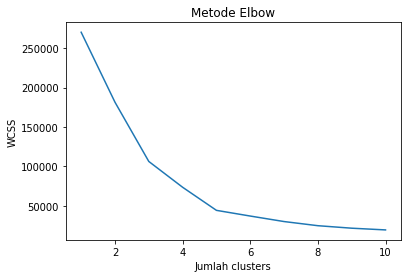

In [ ]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans #mengimpor library K-Means.
wcss = [] #membuat list WCSS (mempersiapkan perhitungan WCSS).
for i in range(1, 11): #adalah perintah looping, perlu diingat bahwa kita ingin melakukan looping 10 kali. Oleh karena itu di python ditulis range(1,11), karena angka 11 tidak diikutkan oleh python. Sehingga jika ingin iterasi sebanyak 21 kali misalnya, maka penulisannya range (1,22).
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # adalah menuliskan objek kmeans untuk melakukan algoritma K-Means. Selanjutnya perintah pertama adalah KMeans (kapital K dan M), yang merupakan class dari library K-Means yang diimpor di line 11, dengan beberapa parameter n_clusters yang merupakan jumlah kluster, diikuti dengan parameter kedua init yang merupakan pemilihan jumlah K di awal (kali ini kita gunakan K++, agar tidak terkena jebakan centroid. Kemudian parameter yang terakhir adalah random_state = 42. Random state ini seperti seed pada R, yang jika dipilih 42, maka ketika kita memilih 42 di kesempatan yang berbeda, maka bilangan random yang dihasilkan akan sama. Tips: Arahkan kurson pada KMeans, lalu ketik CTRL+i pada keyboard untuk menampilkan parameter apa saja yang diperlukan.
    kmeans.fit(X) #merupakan perintah agar objek kmeans, digunakan untuk mengolah data X yang sudah kita definisikan
    wcss.append(kmeans.inertia_) #merupakan perintah untuk menghitung WCSS dengan menuliskan perintah append setelah wcss. Append merupakan method di python untuk menambahkan objek. Algoritma wcss dituliskan dengan perintah kmeans.inertia_ (dengan underscore).
plt.plot(range(1, 11), wcss) #merupakan perintah untuk menampilkan plot. Sumbu x pada plot adalah jumlah kluster dari 1-10, maka ditulis range(1,11). Sumbu y nya adalah skor wcss yang dihitung
plt.title('Metode Elbow') #adalah perintah plot untuk estetika, seperti nama sumbu x, sumbu y dll
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show() # adalah perintah menampilkan plotnya.

Hasil perhitungan WCSS dari K=1 sampai K=10
Melalui gambar di atas, dapat dilihat bahwa bentuk elbow (siku) terlihat saat jumlah kluster adalah 5. Oleh karena itu, kita tentukan bahwa jumlah K yang baik adalah 5.

Note: Jika pembaca berpendapat bahwa bentuk siku juga terlihat pada K=3, maka itu juga benar. Dalam kondisi seperti ini, di mana K=3 dan K=5 menunjukkan bentuk siku, kita pilih yang nilai K nya lebih besar, dalam hal ini K=5.

In [ ]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) #adalah perintah melakukan K-Means clustering terhadap objek kmeans. namun kali ini parameter n_clusters diisi dengan 5.
y_kmeans = kmeans.fit_predict(X) #adalah melakukan prediksi seperti apa pengelompokan klusternya jika kita pilih K=5. Kita siapkan objek y_kmeans (tentu saja pemilihan nama ini bebas) dengan method bukan fit melainkan fit_predict terhadap variabel X yang sudah didefinisikan

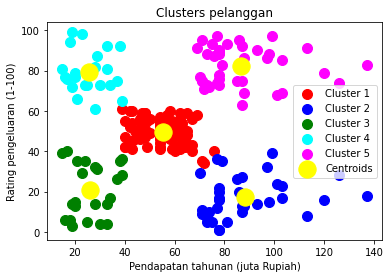

In [ ]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') # perintah untuk menampilkan semua data poin yang masuk ke cluster 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters pelanggan')
plt.xlabel('Pendapatan tahunan (juta Rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show() #perintah untuk menampilkan plotnya.

Kita ingin menampilkan scatter plot, sehingga perintahnya adalah plt.scatter. Parameter untuk plt.scatter adalah sumbu x, kemudian diikuti sumbu y nya. Sumbu x adalah pendapatan tahunan, dan sumbu y adalah rating pengeluaran. Sumbu x dan y nya dari objek X yang didefinisikan.Kemudian untuk sumbu x nya ditulis X[y_kmeans == 0, 0] artinya data poin nya berasal dari objek X. Penulisan y_kmeans == 0 adalah untuk mewakili baris X yang dipilih, yaitu baris yang clusternya masuk ke cluster 1 (urutan dimulai dari nol).

Untuk kolomnya mudah saja, karena ia adalah data penghasilan tahunan, maka kolom 1 objek X yang kita pilih, sehingga penulisannya setelah
y_kmeans == 0 adalah koma, kemudian diikuti nol.

Untuk sumbu y nya, ditulis X[y_kmeans == 0, 1] di mana bisa langsung dilihat bahwa kolom untuk rating pengeluaran rutin adalah kolom ke 2, ditulis 1 di python.

Begitu seterusnya sampai kluster kelima.

**Ceritakanlah ide anda mengenai kemungkinan penerapannya pada data/kasus lain**
metode k-means clustering adalah metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan tanpa supervisi (unsupervised) dan merupakan salah satu metode yang melakukan pengelompokan data dengan sistem partisi dan  dengan cara kerja mengelompokan centroid secara acak yangdigunakan sebagai titik awal untuk setiap cluster, dan kemudian melakukan perhitungan berulang (berulang) untuk mengoptimalkan posisi centroid. Proses ini berhenti atau telah selesai dalam mengoptimalkan cluster ketika:
1. Centroid telah stabil, yang artinya tidak ada perubahan dalam nilai-nilai mereka karena pengelompokan telah berhasil.
2. Jumlah iterasi yang ditentukan telah tercapai. 

saya mempunyai ide penerapan metode ini untuk kasus lain kedepanya yaitu membedakan ciri ciri penderita virus baru omicron dengan penderita covid-19 jadi k-means diterapkan untuk membuat cluster ciri ciri nya sehingga di harapkan dengan adanya machine learning ini orang dengan gejala serupa dapat langsung teridentifikasi dengan cepat.
